# Part 1: Predicting Pulsars using the Scikit-learn Library

As a continuation of the neutron star project from the midterm, I looked through papers and once again found out how difficult it was to find a data set that I could easily code. So I decided to switch it up and see if I could find code from GitHub that would be interesting to reproduce and discuss. Here is the link of the code I will be following along with and commenting. https://github.com/Smarty2298/Predicting-pulsar-star/blob/master/predicting%20a%20pulsar%20star.ipynb. 

In addition upon doing further research about target_class I found a link from Kagle! The dataset I used below is from the High Time Resolution Universe Survey. https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star

## Importing Libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Getting dataset and cleaning it

In [206]:
url = 'https://raw.githubusercontent.com/Smarty2298/Predicting-pulsar-star/master/pulsar_stars.csv'

In [226]:
df = pd.read_csv(url)
df = df.dropna()
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


I had quite a bit of problems getting this csv file the second time around, so I resorted to going through the method we used on the HW #5 assignment. Instead of creating a new csv file via excel and text edit, I used the url which stored all of the information. 

## No of columns in the dataset

In [208]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

The titles of each of the columns, and the datatype being object.

## Getting x_data

In [209]:
x_data = df.iloc[:,0:-1].values
x_data[0:5]

array([[  1.40562500e+02,   5.56837821e+01,  -2.34571412e-01,
         -6.99648398e-01,   3.19983278e+00,   1.91104263e+01,
          7.97553179e+00,   7.42422249e+01],
       [  1.02507812e+02,   5.88824300e+01,   4.65318154e-01,
         -5.15087909e-01,   1.67725752e+00,   1.48601457e+01,
          1.05764867e+01,   1.27393580e+02],
       [  1.03015625e+02,   3.93416494e+01,   3.23328365e-01,
          1.05116443e+00,   3.12123746e+00,   2.17446687e+01,
          7.73582202e+00,   6.31719091e+01],
       [  1.36750000e+02,   5.71784487e+01,  -6.84146380e-02,
         -6.36238369e-01,   3.64297659e+00,   2.09592803e+01,
          6.89649891e+00,   5.35936607e+01],
       [  8.87265625e+01,   4.06722254e+01,   6.00866079e-01,
          1.12349169e+00,   1.17892977e+00,   1.14687196e+01,
          1.42695728e+01,   2.52567306e+02]])

Taking each of the rows from the dataframe, and displaying the first 5. 

## Scaling the data

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

## Getting y_data

In [211]:
y_data = df.iloc[:,-1].values
y_data[0:5]

array([0, 0, 0, 0, 0])

Taking the target_class column, and displaying the first 5.

## Printing number of instances of each unique variable in target_class column

In [212]:
unique, counts = np.unique(y_data,return_counts=True)
print(unique,counts)

[0 1] [16259  1639]


The unique variable keeps track of all the zeros, and ones in the target_class column, and the counts tracks the number of occurences. 0 means non-pulsar, and 1 means pulsar. 

## Splitting data into random training and testing subsets

In [213]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

In [214]:
from sklearn.linear_model import LinearRegression

In [215]:
classifier = LinearRegression() # Training variables are used for linear regression
classifier.fit(x_train,y_train) # and hence the classifying method

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
classifier.score(x_train,y_train)

0.6819666326545073

The classifier method scored 68% accuracy.

In [217]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,x_test,y_test,cv=100)
print(results)

[ 0.76234036  0.6533828   0.77813434  0.69111941  0.49859826  0.83882309
  0.72717312  0.62595555  0.6973786   0.67847908  0.47938231  0.6116136
  0.46925422  0.84021698  0.68197838  0.01488652  0.64877299  0.84966627
  0.84881995  0.61234224  0.87051125  0.86549137  0.59262715  0.62490675
  0.57785927  0.82588235  0.84649852  0.38072441  0.66967083  0.74204254
  0.80457499  0.6668518   0.8772637   0.59147952  0.62668106  0.74103
  0.84978396  0.80496328  0.84787003  0.          0.68649129  0.3015547
  0.58195313  0.66042798  0.8272697   0.75681494  0.66763154  0.7701734   0.
  0.89171676  0.70528666  0.66138946  0.70748052 -0.13079492  0.79131167
  0.6842808   0.49434809  0.52825684  0.22371382  0.76363111  0.64551443
  0.52855048  0.73546327  0.63997207  0.63843258  0.51814768  0.73704823
  0.86722609  0.61868906  0.66826497  0.66844997  0.75743692  0.51728612
  0.21357818  0.75317044  0.45455696  0.68945889  0.86088133  0.63347318
  0.44953513 -0.0040702   0.78020665  0.82535783  0.

In [222]:
max(results)

0.89171676141245382

Evaluating the performance of the model selection method by cross validation. In this cross validation case (cv=100) the best case scenario is 91.2%. Of course by increasing the level of cv the this method will be more accurate.

## Plotting results of the dataframe

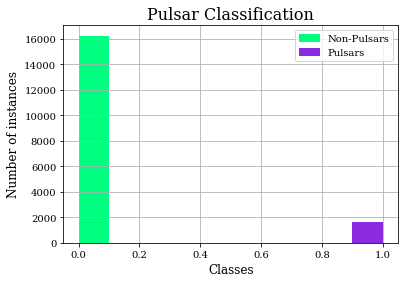

In [224]:
fig, ax =  plt.subplots()
sg_patch = mpatches.Patch(color='springgreen', label='Non-Pulsars')        #labeling and color coding each bin
bv_patch = mpatches.Patch(color='blueviolet', label='Pulsars')             #Hulk inspired colors

n, bins, patches = ax.hist(y_data)
patches[0].set_facecolor('springgreen')
patches[9].set_facecolor('blueviolet')
plt.title('Pulsar Classification', fontsize = 16) 
plt.xlabel('Classes', fontsize = 12)
plt.ylabel('Number of instances', fontsize = 12)
plt.rcParams["font.family"] = 'serif'                                      #changing font
plt.grid(True)
plt.legend(handles = [sg_patch, bv_patch])
plt.show()

Since target_class data only includes zeros and ones there are no classes in betweeen.

# ----------------------------------------------------------------------------------------

## And now a special message brought you by the HULK!
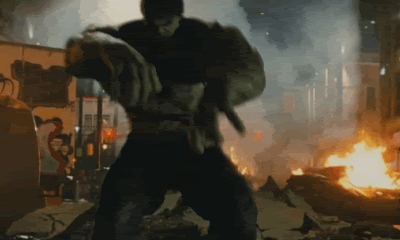

# ----------------------------------------------------------------------------------------

In [ ]:
y_data

In [55]:
total = sum(counts)               # number of points
total

17898

In [58]:
counts[1]                         # number of pulsars

1639

In [61]:
pp = round(counts[1]/total*100,2) # pulsar percentage
pp

9.1600000000000001

### *In conclusion, based on this dataset only 9.16% of the data were actually pulsars, with a total of 1639.*

# ============================================================
# Part 2: Tracing the path of a Double (Rainbow... I mean...) Pendulum with odeint function, and animation
###### For your personal amusement...

[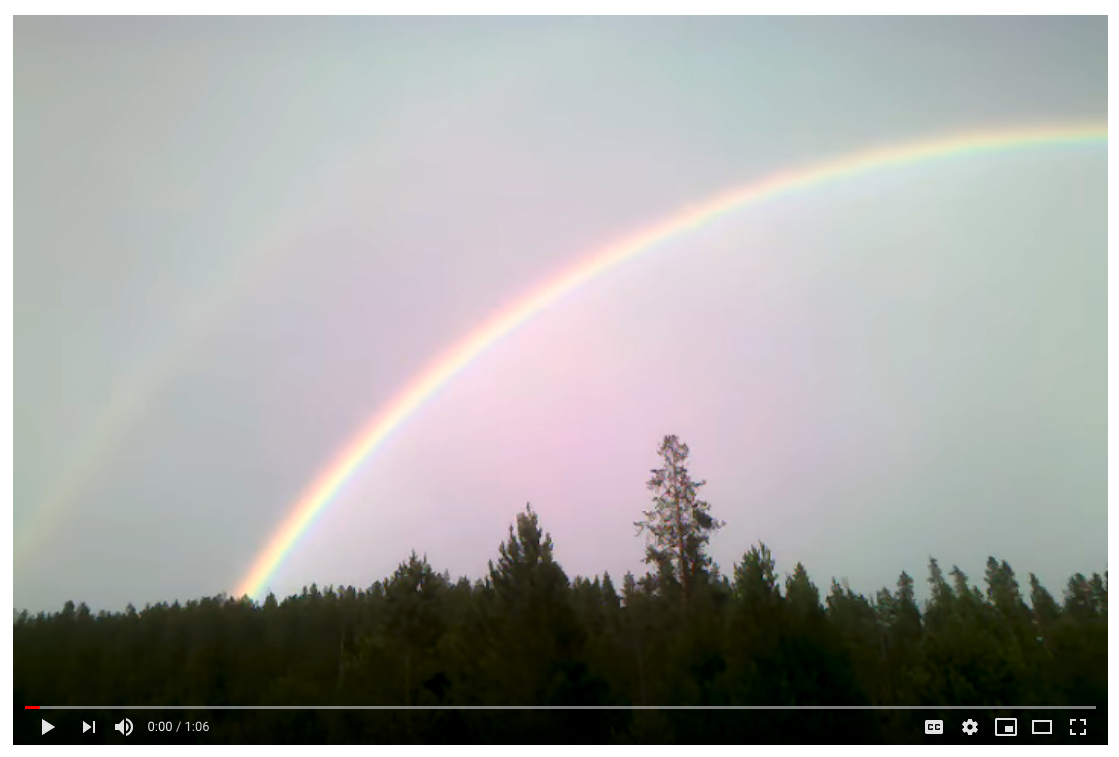](https://youtu.be/99E9fDgZZuE "DOUBLE RAINBOW GUY ORIGINAL NO")

*Continuing on the tangent...*

I just learned how to embed videos with screenshots in Markdown!! Thank you GitHub :] If you are interested follow this link https://stackoverflow.com/questions/11804820/embed-a-youtube-video?rq=1

# ----------------------------------------------------------------------------------------

So the reason I chose to do this physics problem is that I worked on modeling this system in undergrad using Mathematica, and I wanted to see how much my phyics and coding skills have developed since then. Here is a cool simulation https://www.myphysicslab.com/pendulum/double-pendulum-en.html that I would have liked to create given enough time but instead I will try something different. I ended up using this link to work through the problem. https://scipython.com/blog/the-double-pendulum/#rating-74

## Import libraries and functions

In [178]:
import sys
from numpy import cos, sin, arange, array
from scipy.integrate import odeint
from scipy.constants import g, pi
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

## Define constants

In [101]:
# Pendulum rod lengths [m], bob masses [kg].
L1, L2 = 1, 1
m1, m2 = 1, 1

In [115]:
g # The gravitational acceleration [m/s^2]

9.80665

In [116]:
π = pi  
π 

3.141592653589793

## Define derivative and energy function 

In [156]:
def d(y, t, L1, L2, m1, m2): #Return the first derivatives of y = θ1, z1, θ2, z2.
    θ1, z1, θ2, z2 = y
    c, s = cos(θ1-θ2), sin(θ1-θ2)
    θ1dot = z1
    z1dot = (m2*g*sin(θ2)*c - m2*s*(L1*z1**2*c + L2*z2**2) - (m1+m2)*g*sin(θ1))/L1/(m1 + m2*s**2)
    θ2dot = z2
    z2dot = ((m1+m2)*(L1*z1**2*s - g*sin(θ2) + g*sin(θ1)*c) + m2*L2*z2**2*s*c)/L2/(m1 + m2*s**2)
    return θ1dot, z1dot, θ2dot, z2dot

In [157]:
def E(y):                   #Return the total energy of the system.
    t1, t1d, t2, t2d = y.T
    V = -(m1 + m2)*L1*g*cos(t1) - m2*L2*g*cos(t2)
    T = 0.5*m1*(L1*t1d)**2 + 0.5*m2*((L1*t1d)**2 + (L2*t2d)**2 + 2*L1*L2*t1d*t2d*cos(t1-t2))
    return T + V

## Setting up time interval and initial conditions

In [158]:
# Maximum time, time point spacings and the time grid [s].
tmax, dt = 30, 0.01
t = arange(0, tmax+dt, dt)
t

array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         2.99800000e+01,   2.99900000e+01,   3.00000000e+01])

In [159]:
# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = array([3*π/7, 0, 3*π/4, 0]) # [radians]
y0

array([ 1.34639685,  0.        ,  2.35619449,  0.        ])

## Numerical Integration of the equations of motion

In [160]:
y = odeint(d, y0, t, args=(L1, L2, m1, m2))
y

array([[ 1.34639685,  0.        ,  2.35619449,  0.        ],
       [ 1.34594748, -0.08986835,  2.35608677, -0.02156461],
       [ 1.34459976, -0.17965344,  2.35576237, -0.04337714],
       ..., 
       [-0.88715866,  2.54448975,  8.97260078,  0.1511766 ],
       [-0.86112884,  2.66142065,  8.97456914,  0.24283679],
       [-0.833932  ,  2.77782366,  8.97746341,  0.33626297]])

## Modify z and θ as functions of time

In [163]:
θ1, θ2 = y[:,0], y[:,2]
θ1, θ2

(array([ 1.34639685,  1.34594748,  1.34459976, ..., -0.88715866,
        -0.86112884, -0.833932  ]),
 array([ 2.35619449,  2.35608677,  2.35576237, ...,  8.97260078,
         8.97456914,  8.97746341]))

## Cartesian coordinate transformation for the two masses

In [164]:
x1 = L1 * sin(θ1)
y1 = -L1 * cos(θ1)
x2 = x1 + L2 * sin(θ2)
y2 = y1 - L2 * cos(θ2)

In [165]:
x1, y1

(array([ 0.97492791,  0.97482782,  0.97452645, ..., -0.77528024,
        -0.75857858, -0.74057927]),
 array([-0.22252093, -0.22295902, -0.22427261, ..., -0.6316174 ,
        -0.65158157, -0.671969  ]))

In [166]:
x2, y2

(array([ 1.68203469,  1.68201076,  1.68193872, ..., -0.3383553 ,
        -0.32342502, -0.30803341]),
 array([ 0.48458585,  0.48407159,  0.48252855, ...,  0.26788057,
         0.24877469,  0.22964293]))

## Determine plotting characteristics

In [167]:
r = 0.05                          # Plotted bob circle radius
trail_secs = 1                    # Plot a trail of the m2 bob's position for the last trail_secs seconds.
max_trail = int(trail_secs / dt)  # This corresponds to max_trail time points.

##  Creating a series of images

In [205]:
def make_plot(i):
    # Plot and save an image of the double pendulum configuration for time point i. The pendulum rods.
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='silver')
    # Circles representing the anchor point of rod 1, and bobs 1 and 2.
    c0 = Circle((0, 0), r/2, fc='silver', zorder=10)
    c1 = Circle((x1[i], y1[i]), r, fc='m', ec='m', zorder=10)
    c2 = Circle((x2[i], y2[i]), r, fc='aqua', ec='aqua', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)
    
    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the trail.
        alpha = (j/ns)**2
        ax.plot(x1[imin:imax], y1[imin:imax], c='m', solid_capstyle='butt', lw=1, alpha=alpha)
        ax.plot(x2[imin:imax], y2[imin:imax], c='aqua', solid_capstyle='butt', lw=2, alpha=alpha)

    # Center the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-L1-L2-r, L1+L2+r)
    ax.set_ylim(-L1-L2-r, L1+L2+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig('img{:04d}.png'.format(i//di), dpi=72)
    plt.cla()

# Make an image every di time points, corresponding to a frame rate of fps (frames per second).
fps = 10
di = int(1/fps/dt)
fig = plt.figure(figsize=(8, 6), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di) 
    make_plot(i)

0 / 300
1 / 300
2 / 300
3 / 300
4 / 300
5 / 300
6 / 300
7 / 300
8 / 300
9 / 300
10 / 300
11 / 300
12 / 300
13 / 300
14 / 300
15 / 300
16 / 300
17 / 300
18 / 300
19 / 300
20 / 300
21 / 300
22 / 300
23 / 300
24 / 300
25 / 300
26 / 300
27 / 300
28 / 300
29 / 300
30 / 300
31 / 300
32 / 300
33 / 300
34 / 300
35 / 300
36 / 300
37 / 300
38 / 300
39 / 300
40 / 300
41 / 300
42 / 300
43 / 300
44 / 300
45 / 300
46 / 300
47 / 300
48 / 300
49 / 300
50 / 300
51 / 300
52 / 300
53 / 300
54 / 300
55 / 300
56 / 300
57 / 300
58 / 300
59 / 300
60 / 300
61 / 300
62 / 300
63 / 300
64 / 300
65 / 300
66 / 300
67 / 300
68 / 300
69 / 300
70 / 300
71 / 300
72 / 300
73 / 300
74 / 300
75 / 300
76 / 300
77 / 300
78 / 300
79 / 300
80 / 300
81 / 300
82 / 300
83 / 300
84 / 300
85 / 300
86 / 300
87 / 300
88 / 300
89 / 300
90 / 300
91 / 300
92 / 300
93 / 300
94 / 300
95 / 300
96 / 300
97 / 300
98 / 300
99 / 300
100 / 300
101 / 300
102 / 300
103 / 300
104 / 300
105 / 300
106 / 300
107 / 300
108 / 300
109 / 300
110 / 300


# THE GRAND FINALE!

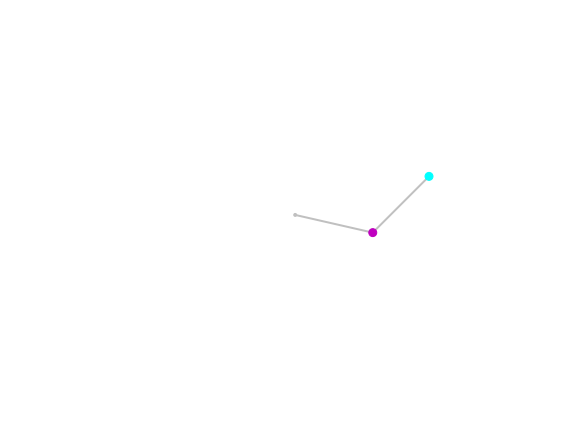

### *I attempted to hard code this animation by using ipywidgets.animate, but ran out of time so I used https://ezgif.com/maker to copile the images together and make a gif. Ideally I would have included the animation on a plot to see the motion but the trails do a good job of tracing the paths.*